In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import random

In [11]:
def error_mae(y_hat, y_true):
  '''
  Given a set of predicted values and the true labels as lists,
  return a scalar value containing the mean absolute error between
  the two
  '''
  err = y_true - y_hat
  abs_err = np.abs(err)
  mae = np.mean(abs_err) #rescale
  return mae

In [88]:
EPS = 0.00000000000000000000000000000001
def error_mape(y_hat, y_true):
  '''
  Given a set of predicted values and the true labels as lists,
  return a scalar value containing the mean absolute predicted
  error between the two
  mape = average of |(y_true - y_hat)/y_true|
  https://en.wikipedia.org/wiki/Mean_absolute_percentage_error
  '''
  err = y_true - y_hat
  abs_relative_err = np.abs((np.abs(err) + EPS)/(y_true + EPS))
  # abs_relative_err = np.abs(relative_err)
  mape = np.mean(abs_relative_err)
  return mape

In [4]:
finetuned_results_df = pd.read_csv('../data/ILI/test_cleaned_month_ILI_finetuned_predictions.csv')
zero_shot_results_df = pd.read_csv('../data/ILI/test_cleaned_month_ILI_zero_shot_predictions.csv')
avg_t1_results_df = pd.read_csv('../data/ILI/test_ili_baselines.csv')

In [5]:
finetuned_results_df.head()

,demographic,month,predicted_ili,observed_ili
0,age 0-4,1,54432.0,70214.0
1,age 0-4,2,15479.0,26458.0
2,age 0-4,3,45585.0,33978.0
3,age 0-4,4,36733.0,43238.0
4,age 0-4,5,50348.0,70628.0


In [6]:
zero_shot_results_df.head()

,demographic,month,predicted_ili,observed_ili
0,age 0-4,1,31563.0,70214.0
1,age 0-4,2,30750.0,26458.0
2,age 0-4,3,27000.0,33978.0
3,age 0-4,4,17000.0,43238.0
4,age 0-4,5,10667.0,70628.0


In [7]:
avg_t1_results_df.head()

,demographic,month,averaged_ili,last_ili,observed_ili
0,age 0-4,1,38033.7,12414.0,70214.0
1,age 0-4,2,38980.9,10057.0,26458.0
2,age 0-4,3,31940.5,13325.0,33978.0
3,age 0-4,4,19440.4,19847.0,43238.0
4,age 0-4,5,15938.8,36828.0,70628.0


In [8]:
finetuned_mae = error_mae(finetuned_results_df['predicted_ili'],
                          finetuned_results_df['observed_ili'])
print('Finetuned MAE = ', finetuned_mae)

finetuned_mape = error_mape(finetuned_results_df['predicted_ili'],
                          finetuned_results_df['observed_ili'])
print('Finetuned MAPE = ', finetuned_mape)

Finetuned MAE =  22.5897
Finetuned MAPE =  0.5161353838070679


In [9]:
zs_mae = error_mae(zero_shot_results_df['predicted_ili'],
                          zero_shot_results_df['observed_ili'])
print('Zero Shot MAE = ', zs_mae)

zs_mape = error_mape(zero_shot_results_df['predicted_ili'],
                          zero_shot_results_df['observed_ili'])
print('Zero Shot MAPE = ', zs_mape)

Zero Shot MAE =  36.59464285714286
Zero Shot MAPE =  0.7126896104204424


In [10]:
avg_mae = error_mae(avg_t1_results_df['averaged_ili'],
                          avg_t1_results_df['observed_ili'])
print('Average Val MAE = ', avg_mae)

avg_mape = error_mape(avg_t1_results_df['averaged_ili'],
                          avg_t1_results_df['observed_ili'])
print('Average Val MAPE = ', avg_mape)

Average Val MAE =  34.992425714285716
Average Val MAPE =  0.5966266810325748


In [11]:
t1_mae = error_mae(avg_t1_results_df['last_ili'],
                          avg_t1_results_df['observed_ili'])
print('T-1 MAE = ', t1_mae)

t1_mape = error_mape(avg_t1_results_df['last_ili'],
                          avg_t1_results_df['observed_ili'])
print('T-1 MAPE = ', t1_mape)

T-1 MAE =  31.070742857142857
T-1 MAPE =  0.5160859818561004


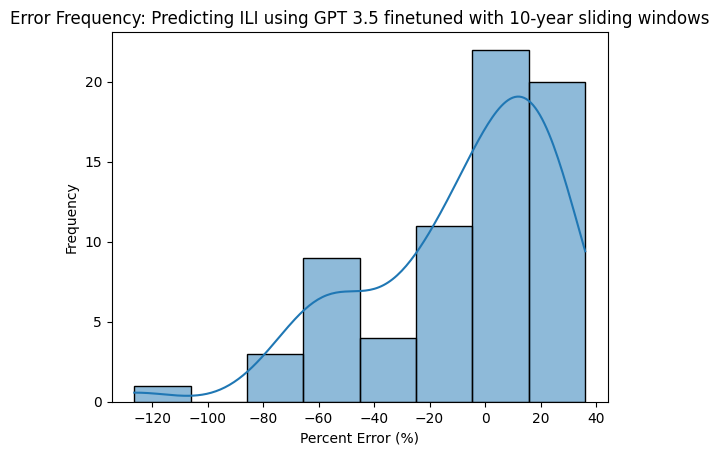

In [21]:
finetuned_results_df['error'] = (finetuned_results_df['observed_ili'] - finetuned_results_df['predicted_ili'])/finetuned_results_df['observed_ili'] * 50
sns.histplot(finetuned_results_df['error'], kde=True)
plt.xlabel('Percent Error (%)')
plt.ylabel('Frequency')
plt.title('Error Frequency: Predicting ILI using GPT 3.5 finetuned with 10-year sliding windows')
plt.show()

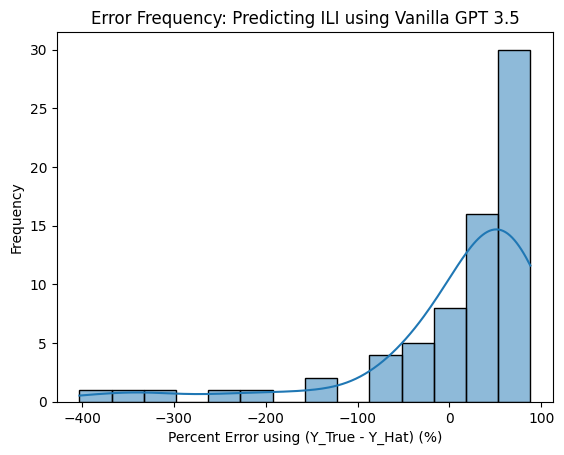

In [20]:
zero_shot_results_df['error'] = (zero_shot_results_df['observed_ili'] - zero_shot_results_df['predicted_ili'])/zero_shot_results_df['observed_ili'] * 100
sns.histplot(zero_shot_results_df['error'], kde=True)
plt.xlabel('Percent Error using (Y_True - Y_Hat) (%)')
plt.ylabel('Frequency')
plt.title('Error Frequency: Predicting ILI using Vanilla GPT 3.5')
plt.show()

#### now for LST

In [5]:
finetuned_results_df = pd.read_csv('../data/CRU/test_cleaned_LST_finetuned_predictions.csv')
zero_shot_results_df = pd.read_csv('../data/CRU/test_cleaned_LST_zero_shot_predictions.csv')
avg_t1_results_df = pd.read_csv('../data/CRU/test_lst_baselines.csv')

In [43]:
finetuned_mae = error_mae(finetuned_results_df['predicted_lst'],
                          finetuned_results_df['observed_lst'])
print('Finetuned MAE = ', finetuned_mae)

finetuned_mape = error_mape(finetuned_results_df['predicted_lst'],
                          finetuned_results_df['observed_lst'])
print('Finetuned MAPE = ', finetuned_mape)

Finetuned MAE =  0.43659090909090903
Finetuned MAPE =  0.10629814958191314


In [63]:
zs_mae = error_mae(zero_shot_results_df['predicted_lst'],
                          zero_shot_results_df['observed_lst'])
print('Zero Shot MAE = ', zs_mae)

zs_mape = error_mape(zero_shot_results_df['predicted_lst'],
                          zero_shot_results_df['observed_lst'])
print('Zero Shot MAPE = ', zs_mape)

Zero Shot MAE =  0.2888636363636365
Zero Shot MAPE =  0.07965213724559767


In [48]:
avg_mae = error_mae(avg_t1_results_df['averaged'],
                          avg_t1_results_df['observed'])
print('Average Val MAE = ', avg_mae)

avg_mape = error_mape(avg_t1_results_df['averaged'],
                          avg_t1_results_df['observed'])
print('Average Val MAPE = ', avg_mape)

Average Val MAE =  0.4539772727272732
Average Val MAPE =  0.11538514687254581


In [69]:
t1_mae = error_mae(avg_t1_results_df['previous'],
                          avg_t1_results_df['observed'])
print('T-1 MAE = ', t1_mae)

t1_mape = error_mape(avg_t1_results_df['previous'],
                          avg_t1_results_df['observed'])
print('T-1 MAPE = ', t1_mape)

T-1 MAE =  0.4709090909090912
T-1 MAPE =  0.13697546587825676


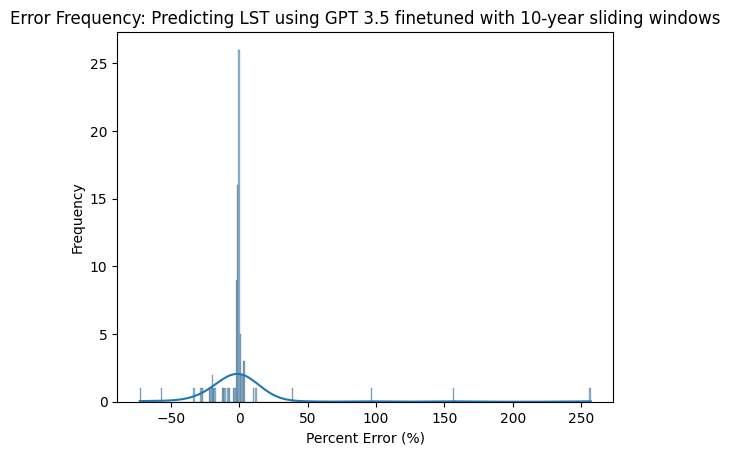

In [51]:
diff = finetuned_results_df['observed_lst'] - finetuned_results_df['predicted_lst']
finetuned_results_df['error'] = (diff)/finetuned_results_df['observed_lst'] * 100
sns.histplot(finetuned_results_df['error'], kde=True)
plt.xlabel('Percent Error (%)')
plt.ylabel('Frequency')
plt.title('Error Frequency: Predicting LST using GPT 3.5 finetuned with 10-year sliding windows')
plt.show()

In [52]:
finetuned_results_df['absolute_error'] = abs(diff)
finetuned_results_df.nlargest(20, 'absolute_error')

,country,predicted_lst,observed_lst,error,absolute_error
60,Norway,-8.72,-5.56,-56.834532,3.16
6,Belarus,-0.79,1.41,156.028369,2.20
38,Kyrgyzstan,8.92,7.01,-27.246790,1.91
73,Svalbard and Jan Mayen,-10.72,-8.86,-20.993228,1.86
23,Faroe Islands,-10.65,-8.88,-19.932432,1.77
66,Russian Federation,-12.61,-14.34,12.064156,1.73
40,Latvia,2.16,3.54,38.983051,1.38
55,Netherlands,5.77,4.50,-28.222222,1.27
22,Estonia,-0.69,0.44,256.818182,1.13
50,Mongolia,4.04,3.03,-33.333333,1.01


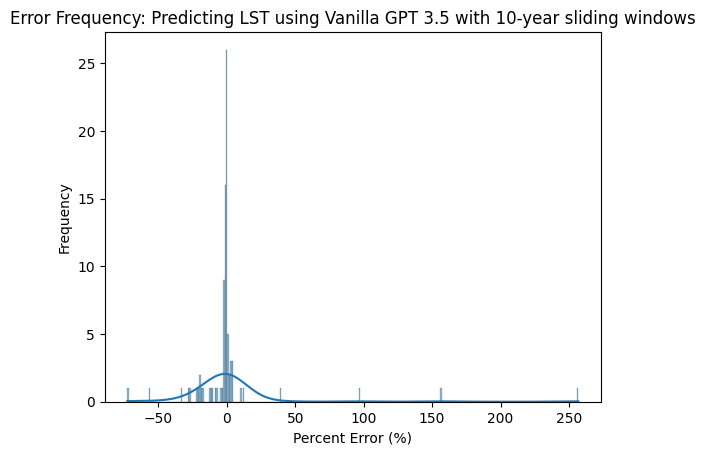

In [55]:
diff = zero_shot_results_df['observed_lst'] - zero_shot_results_df['predicted_lst']
zero_shot_results_df['error'] = (diff)/zero_shot_results_df['observed_lst'] * 100
sns.histplot(finetuned_results_df['error'], kde=True)
plt.xlabel('Percent Error (%)')
plt.ylabel('Frequency')
plt.title('Error Frequency: Predicting LST using Vanilla GPT 3.5 with 10-year sliding windows')
plt.show()

In [56]:
zero_shot_results_df['absolute_error'] = abs(diff)
zero_shot_results_df.nlargest(20, 'absolute_error')

,country,predicted_lst,observed_lst,absolute_error,error
42,Lithuania,4.00,2.68,1.32,-49.253731
50,Mongolia,3.99,3.03,0.96,-31.683168
60,Norway,-4.70,-5.56,0.86,15.467626
38,Kyrgyzstan,7.75,7.01,0.74,-10.556348
55,Netherlands,5.23,4.50,0.73,-16.222222
7,Belgium,5.35,4.65,0.70,-15.053763
84,Uzbekistan,9.00,8.32,0.68,-8.173077
66,Russian Federation,-13.69,-14.34,0.65,4.532775
65,Poland,4.90,4.29,0.61,-14.219114
75,Sweden,-2.15,-2.74,0.59,21.532847


In [59]:
one_shot_results_df = pd.read_csv('../data/CRU/test_cleaned_LST_one_shot_predictions.csv')

In [62]:
os_mae = error_mae(one_shot_results_df['predicted_lst'],
                          one_shot_results_df['observed_lst'])
print('One Shot MAE = ', os_mae)

os_mape = error_mape(one_shot_results_df['predicted_lst'],
                          one_shot_results_df['observed_lst'])
print('One Shot MAPE = ', os_mape)

One Shot MAE =  0.2776136363636366
One Shot MAPE =  0.0656451651398053


In [89]:
finetuned_results_df = pd.read_csv('../data/CRU/test_cleaned_LST_growth_finetuned_predictions.csv')
zero_shot_results_df = pd.read_csv('../data/CRU/test_cleaned_LST_growth_zero_shot_predictions.csv')
avg_t1_results_df = pd.read_csv('../data/CRU/test_lst_growth_baselines.csv')
one_shot_results_df = pd.read_csv('../data/CRU/test_cleaned_LST_growth_one_shot_predictions.csv')

In [90]:
avg_mae = error_mae(avg_t1_results_df['averaged'],
                          avg_t1_results_df['observed'])
print('Average Val MAE = ', avg_mae)

avg_mape = error_mape(avg_t1_results_df['averaged'],
                          avg_t1_results_df['observed'])
print('Average Val MAPE = ', avg_mape)

Average Val MAE =  0.440909090909091
Average Val MAPE =  1.1363636363636364e+28


In [91]:
t1_mae = error_mae(avg_t1_results_df['previous'],
                          avg_t1_results_df['observed'])
print('T-1 MAE = ', t1_mae)

t1_mape = error_mape(avg_t1_results_df['previous'],
                          avg_t1_results_df['observed'])
print('T-1 MAPE = ', t1_mape)

T-1 MAE =  0.6522727272727272
T-1 MAPE =  1.931818181818182e+29


In [92]:
finetuned_mae = error_mae(finetuned_results_df['predicted_lst_growth'],
                          finetuned_results_df['observed_lst_growth'])
print('Finetuned MAE = ', finetuned_mae)

finetuned_mape = error_mape(finetuned_results_df['predicted_lst_growth'],
                          finetuned_results_df['observed_lst_growth'])
print('Finetuned MAPE = ', finetuned_mape)

Finetuned MAE =  0.4048863636363636
Finetuned MAPE =  1.931818181818182e+29
